# EAA CA2
## Analysing a resource usage/load

### The system configuration:
* Motherboard: 2560 MB memory
* Processor: 1 CPU, execution cap: 100%
* Operating system: Linux Fedora 64bits (virtual machine)
* Memory: 1 disk, virtual size 19.25GB (actual size 11.74GB)

### The test:
The resource tested here is the processor, only 1 CPU is used for simplicity.

#### Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange
plt.style.use('ggplot')

#### Reading the data and converting to numbers

In [3]:
def numerical_converter(n):
    try:
        return int(n)
    except ValueError:
        return float(n)

with open('results.dat','r') as f:
    next(f)
    df = pd.DataFrame(map(numerical_converter, l.rstrip().split()) for l in f) # reading file

    df.columns = ['C0', 'N', 'idle'] # setting the header

In [4]:
df.head() # displaying five first rows

,C0,N,idle
0,22,1,68.95
1,38,2,57.59
2,51,3,53.07
3,64,4,51.55
4,76,5,44.56


## Ui vs N
Ui is the utilisation of resource, `Ui`

N is the number of concurrent users

Ui for a CPU is the amount of time not spent in idle task

The resource here is the CPU, each loadtest runs during 5 seconds and a summary is generated at 4 seconds, the busy time will be calculated with the formula `100 - idle`.

`Ui = (100 - idle)`

In [15]:
df['Ui'] = (100 - df['idle']) # calculating Ui

In [16]:
df.head() # displaying five first rows

,C0,N,idle,Ui,Di,X0
0,22,1,68.95,31.05,5.645455,5.50
1,38,2,57.59,42.41,4.464211,9.50
2,51,3,53.07,46.93,3.680784,12.75
3,64,4,51.55,48.45,3.028125,16.00
4,76,5,44.56,55.44,2.917895,19.00


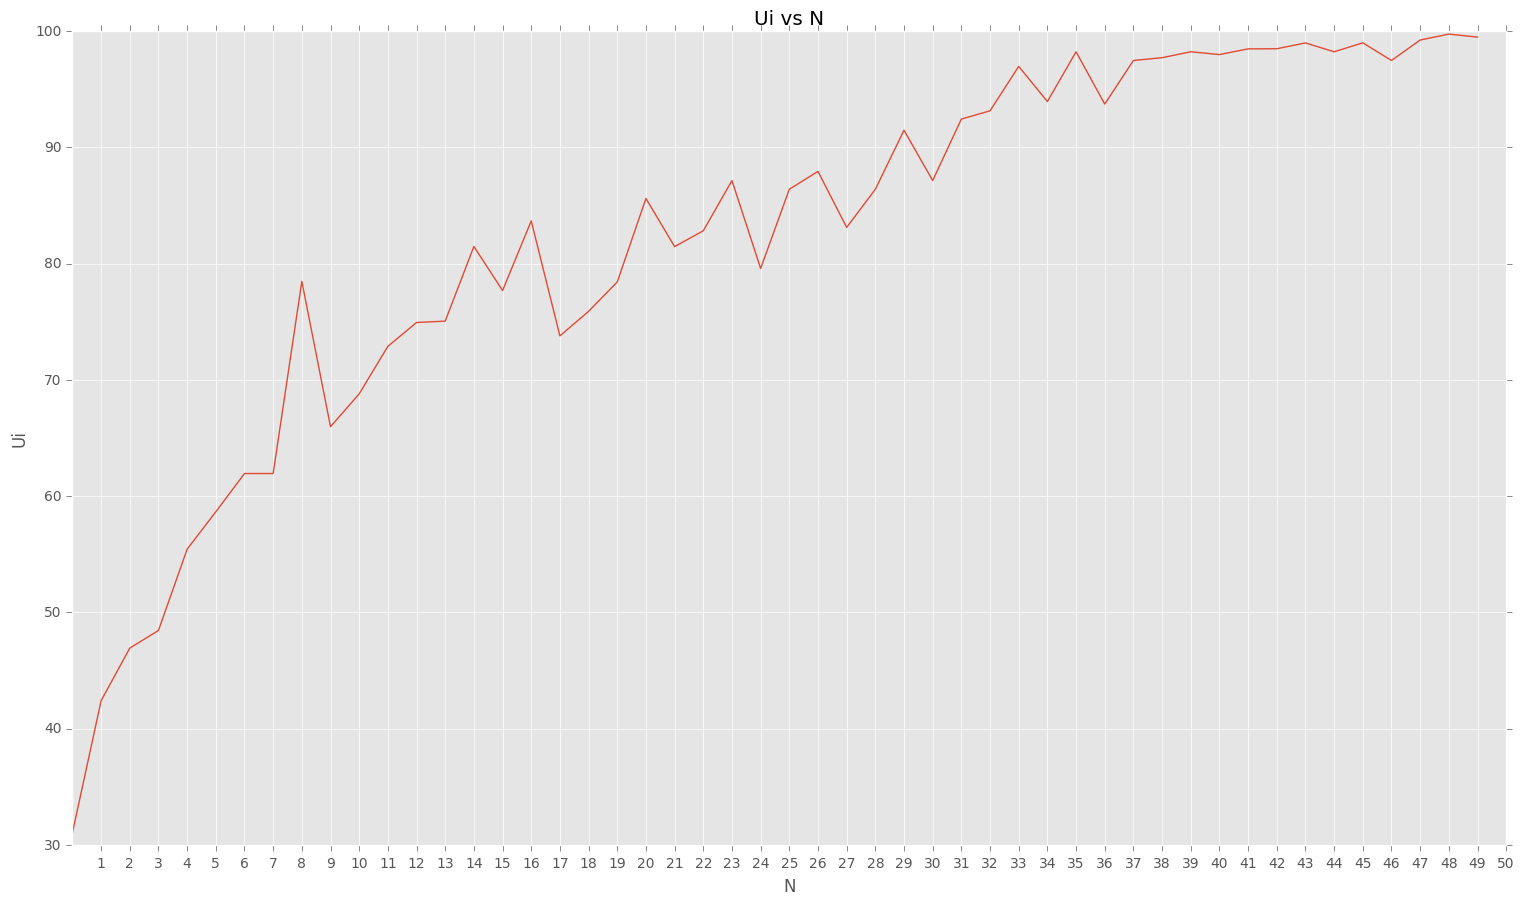

In [17]:
plt.plot(df['Ui'])
plt.xticks(df['N'])
plt.title("Ui vs N")
plt.xlabel("N")
plt.ylabel("Ui")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

### Analysis
The CPU is getting saturated around 33 concurrent users where it reaches 95%

## Di vs N
Di is the service demand, `Di = Vi * Si = Ui / X0`

N is the number of concurrent users

X0 is the throughput `X0 = C0/T = C0 / 4`

T is the length of time in the observation period (4 seconds)


`Di = Ui / (C0 / 4)`

In [8]:
df['Di'] = df['Ui']/(df['C0']/4)

In [9]:
df.head()

,C0,N,idle,Ui,Di
0,22,1,68.95,31.05,5.645455
1,38,2,57.59,42.41,4.464211
2,51,3,53.07,46.93,3.680784
3,64,4,51.55,48.45,3.028125
4,76,5,44.56,55.44,2.917895


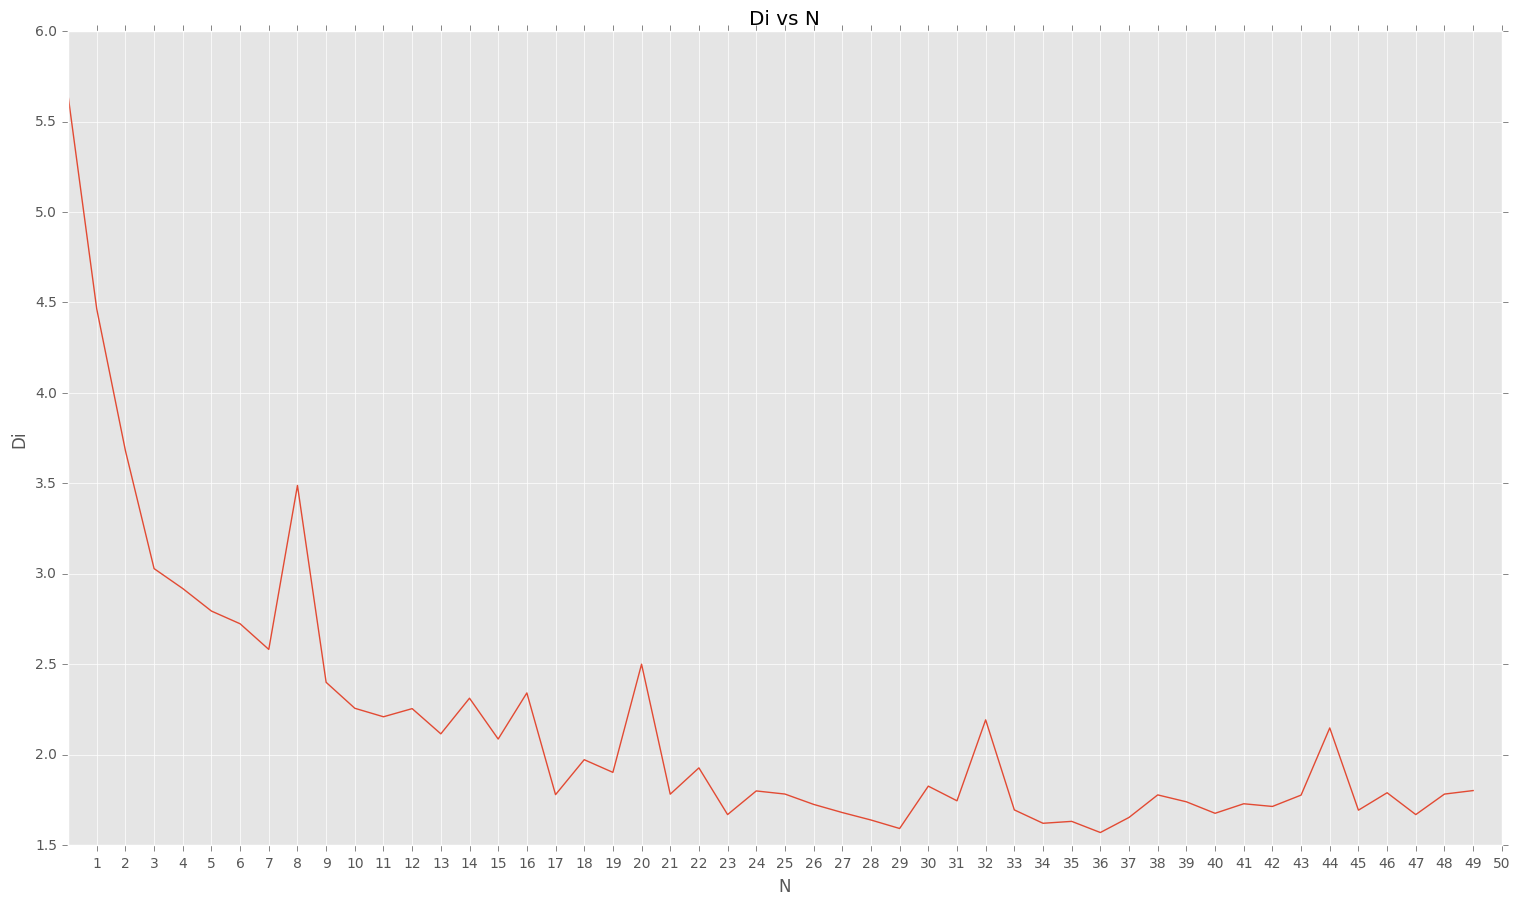

In [10]:
plt.plot(df['Di'])
plt.xticks(df['N'])
plt.title("Di vs N")
plt.xlabel("N")
plt.ylabel("Di")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [ ]:
### Analysis


## X0 vs N
X0 is the system throughput, `X0 = C0 / T`

T is the length of time in the observation period

In [11]:
df['X0'] = df['C0'] / 4

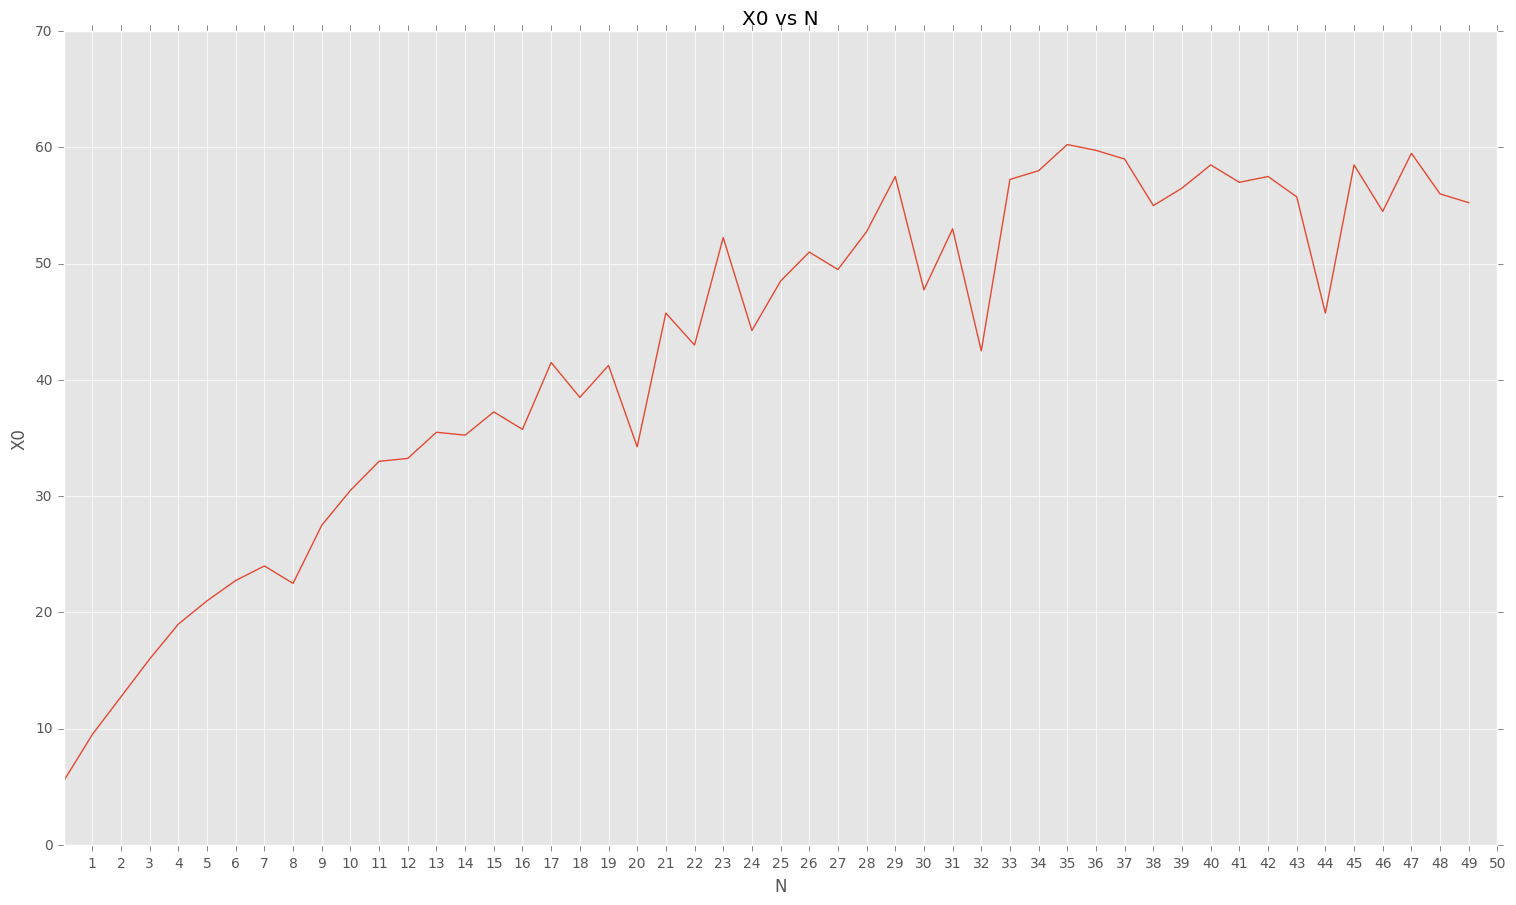

In [12]:
plt.plot(df['X0'])
plt.xticks(df['N'])
plt.title("X0 vs N")
plt.xlabel("N")
plt.ylabel("X0")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

## R vs N
R is the interactive response time, `R = (M / X0) - Z`

Z is the average think time

M is the number of concurrent users, here `M = N`

## Summary

In [13]:
summary = df.drop('N', 1).describe()[1:] # Strip off count as it will always be 50, Excluding N
summary

,C0,idle,Ui,Di,X0
mean,170.260000,17.95720,82.04280,2.164804,42.565000
std,60.846347,16.97755,16.97755,0.777777,15.211587
min,22.000000,0.25000,31.05000,1.568703,5.500000
25%,134.000000,2.52000,74.97000,1.715731,33.500000
50%,183.000000,13.99500,86.00500,1.799684,45.750000
75%,223.750000,25.03000,97.48000,2.297551,55.937500
max,241.000000,68.95000,99.75000,5.645455,60.250000


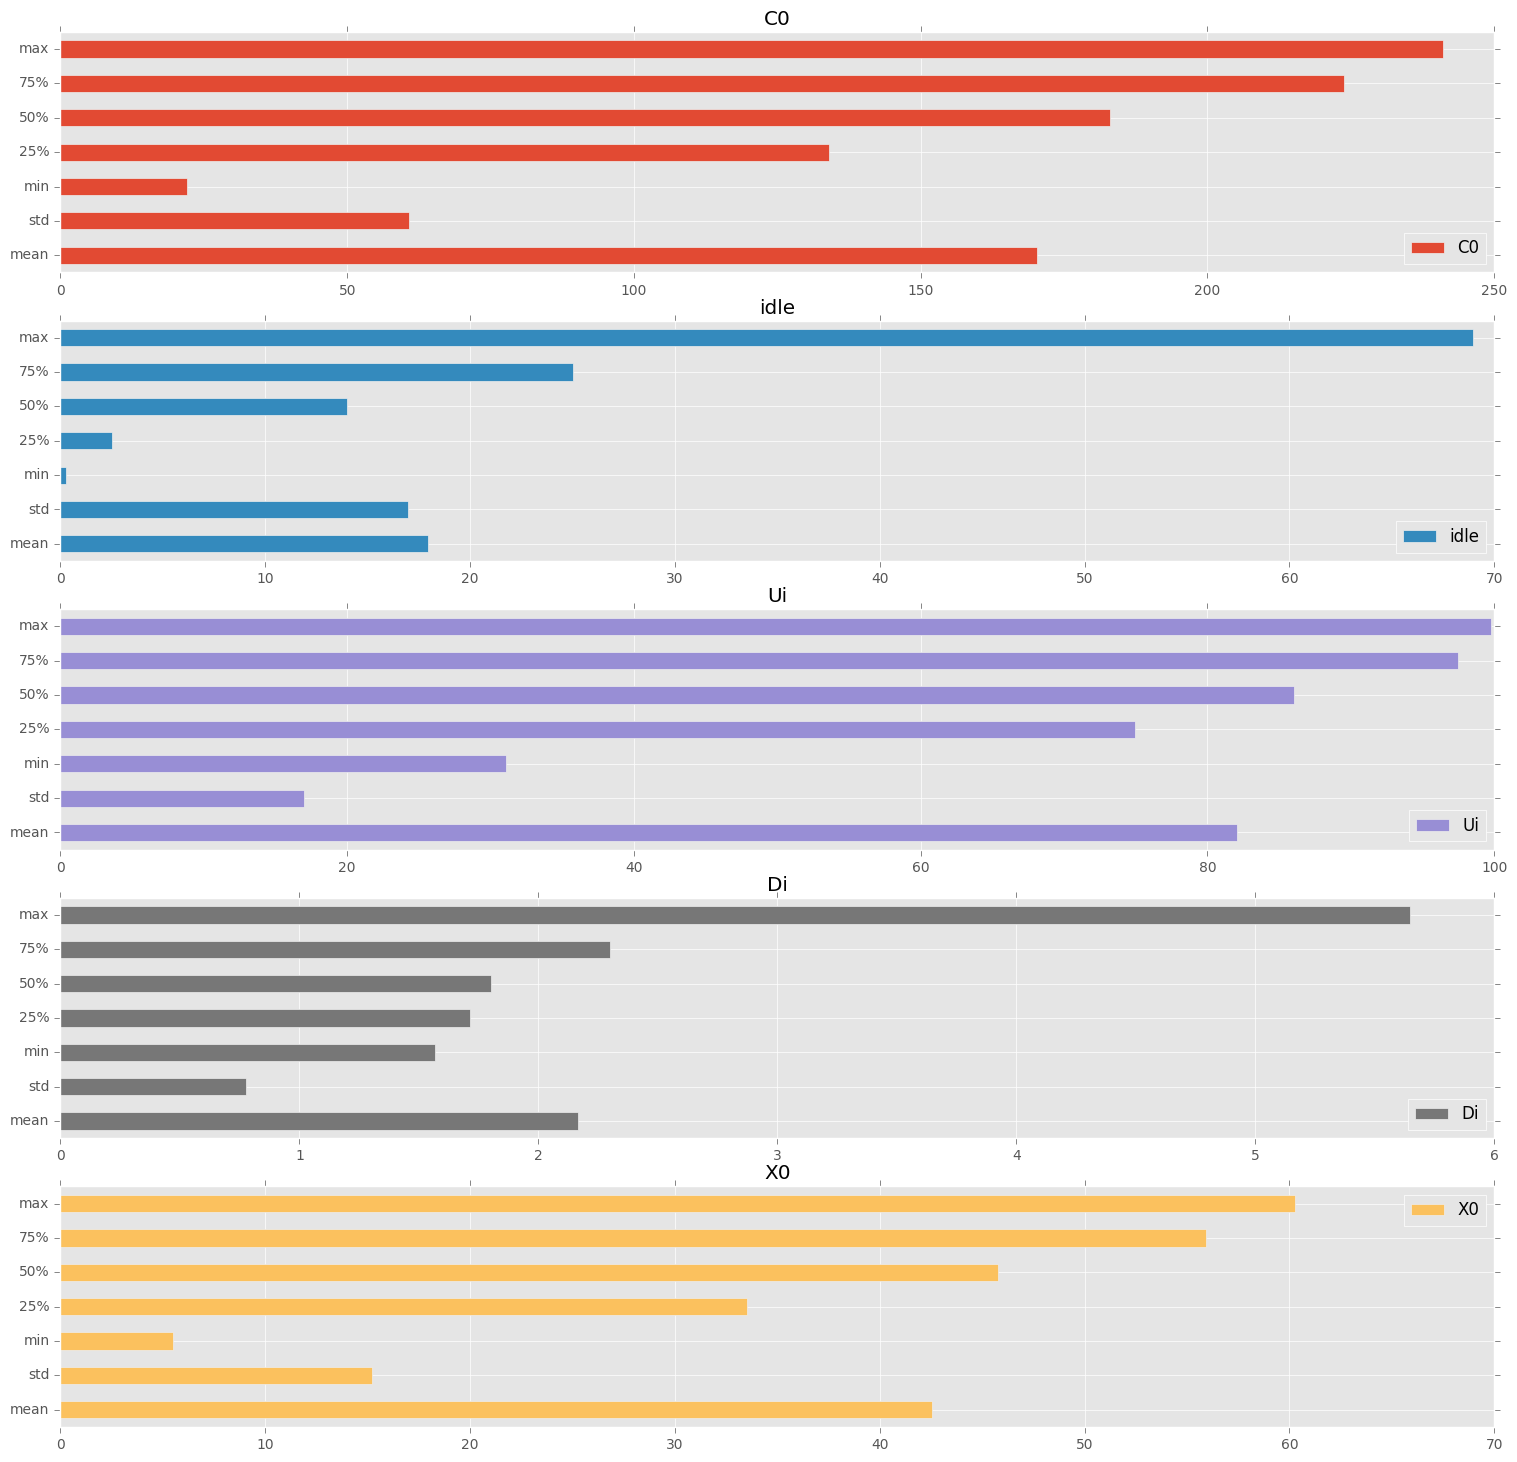

In [14]:
summary.plot(kind='barh', subplots=True, sharex=False)

fig = plt.gcf()
fig.set_size_inches(18.5, 18)

plt.show()